In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


In [2]:
#data_file = '../../data/food/FoodBalanceSheets_E_All_Data_(Normalized).csv'
data_file = 'C:/Users/Sarah Bridle/Dropbox/scratch/food/FAOSTAT/dl_20220511/FoodBalanceSheets_E_All_Data_(Normalized).csv'
pn18_file = '../../data/food/PN18.csv'

# Plant scaling 0-1
plant_production = 0.5 

plant_mask = np.arange(4,10)
animal_mask = [0,1,2,3,10]


# uk_area = 10
uk_area = 229
pop_code = 511



In [3]:
pn18 = pd.read_csv(pn18_file, sep=':')

item_codes = pn18['code'].to_numpy()
item_codes[19] = 2807
item_codes[40] = 2552
# item_codes = np.unique(food_uk['Item Code'])

fbs = pd.read_csv(data_file, encoding = 'latin1')

food_uk = fbs[(fbs['Year'] == 2019) & (fbs['Area Code'] == uk_area)].drop(['Area Code', 'Area', 'Year Code', 'Flag'], axis=1)
food_uk = food_uk[food_uk['Item Code'].isin(item_codes)]

for code in item_codes:
    print(code, food_uk[food_uk['Item Code'] == code]['Item'].iloc[0])
    
element_codes = pd.unique(food_uk['Element Code'])
quantity_codes = np.array([5511, 5611, 5072, 5911, 5301, 5123, 5131, 5170, 5142, 5521, 5527, 5154])

for qcode in element_codes:
    print(qcode, food_uk[food_uk['Element Code'] == qcode]['Element'].iloc[0])


2731 Bovine Meat
2732 Mutton & Goat Meat
2733 Pigmeat
2734 Poultry Meat
2735 Meat, Other
2736 Offals, Edible
2744 Eggs
2740 Butter, Ghee
2743 Cream
2848 Milk - Excluding Butter
2511 Wheat and products
2513 Barley and products
2514 Maize and products
2515 Rye and products
2516 Oats
2520 Cereals, Other
2531 Potatoes and products
2534 Roots, Other
2535 Yams
2807 Rice and products
2546 Beans
2547 Peas
2549 Pulses, Other and products
2555 Soyabeans
2543 Sweeteners, Other
2558 Rape and Mustardseed
2570 Oilcrops, Other
2571 Soyabean Oil
2572 Groundnut Oil
2573 Sunflowerseed Oil
2574 Rape and Mustard Oil
2576 Palmkernel Oil
2577 Palm Oil
2578 Coconut Oil
2579 Sesameseed Oil
2580 Olive Oil
2582 Maize Germ Oil
2586 Oilcrops Oil, Other
2745 Honey
2551 Nuts and products
2552 Groundnuts
2560 Coconuts - Incl Copra
2561 Sesame seed
2775 Aquatic Plants
2563 Olives (including preserved)
2601 Tomatoes and products
2602 Onions
2611 Oranges, Mandarines
2612 Lemons, Limes and products
2613 Grapefruit and p

In [4]:
food_uk[food_uk['Item Code']==2561]

,Item Code,Item,Element Code,Element,Year,Unit,Value
2267365,2561,Sesame seed,5611,Import Quantity,2019,1000 tonnes,7.00
2267371,2561,Sesame seed,5072,Stock Variation,2019,1000 tonnes,-1.00
2267381,2561,Sesame seed,5911,Export Quantity,2019,1000 tonnes,0.00
2267391,2561,Sesame seed,5301,Domestic supply quantity,2019,1000 tonnes,7.00
2267397,2561,Sesame seed,5521,Feed,2019,1000 tonnes,0.00
2267411,2561,Sesame seed,5170,Residuals,2019,1000 tonnes,0.00
2267421,2561,Sesame seed,5142,Food,2019,1000 tonnes,7.00
2267431,2561,Sesame seed,645,Food supply quantity (kg/capita/yr),2019,kg,0.10
2267441,2561,Sesame seed,664,Food supply (kcal/capita/day),2019,kcal/capita/day,2.00
2267451,2561,Sesame seed,674,Protein supply quantity (g/capita/day),2019,g/capita/day,0.05


In [5]:
groups = [pn18.iloc[np.where(pn18['group_id'] == gid)]['code'].to_numpy() for gid in range(12)]
group_names = pd.unique(pn18['group'])

print(group_names)

['Ruminant Meat' 'Other Meat' 'Egg' 'Dairy' 'Cereals, starch' 'Pulses'
 'Sugar, veg. oil' 'Nuts, seeds' 'Vegetables, fruits' 'Other'
 'Fish, seafood' 'Non-food']


In [6]:
group_names[plant_mask]

array(['Cereals, starch', 'Pulses', 'Sugar, veg. oil', 'Nuts, seeds',
       'Vegetables, fruits', 'Other'], dtype=object)

In [7]:
group_names[animal_mask]

array(['Ruminant Meat', 'Other Meat', 'Egg', 'Dairy', 'Fish, seafood'],
      dtype=object)

In [8]:
pop = fbs[(fbs['Year'] == 2019) & 
          (fbs['Area Code'] == uk_area) &
          (fbs['Element Code'] == pop_code)]['Value'].values * 1000
pop

array([67530000.])

In [9]:
value = food_uk['Value'].values
unit = food_uk['Unit'].values

new_units = ['kcal/capita/day', 'gprot/capita/day', 'gfat/capita/day']

for i, new_unit in enumerate(new_units):

    food_uk.insert(len(food_uk.columns), f'Unit{i+2}', unit)
    food_uk.insert(len(food_uk.columns), f'Value{i+2}', value)
    
    food_uk.loc[food_uk[f'Unit{i+2}'] == '1000 tonnes', f'Unit{i+2}'] = new_unit
    food_uk.loc[food_uk[f'Unit{i+2}'] == 'kg', f'Unit{i+2}'] = 'g/capita/day'

food_uk

,Item Code,Item,Element Code,Element,Year,Unit,Value,Unit2,Value2,Unit3,Value3,Unit4,Value4
2263148,2511,Wheat and products,5511,Production,2019,1000 tonnes,16225.00,kcal/capita/day,16225.00,gprot/capita/day,16225.00,gfat/capita/day,16225.00
2263158,2511,Wheat and products,5611,Import Quantity,2019,1000 tonnes,2521.00,kcal/capita/day,2521.00,gprot/capita/day,2521.00,gfat/capita/day,2521.00
2263168,2511,Wheat and products,5072,Stock Variation,2019,1000 tonnes,612.00,kcal/capita/day,612.00,gprot/capita/day,612.00,gfat/capita/day,612.00
2263178,2511,Wheat and products,5911,Export Quantity,2019,1000 tonnes,1714.00,kcal/capita/day,1714.00,gprot/capita/day,1714.00,gfat/capita/day,1714.00
2263188,2511,Wheat and products,5301,Domestic supply quantity,2019,1000 tonnes,16420.00,kcal/capita/day,16420.00,gprot/capita/day,16420.00,gfat/capita/day,16420.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276853,2680,Infant food,5142,Food,2019,1000 tonnes,53.00,kcal/capita/day,53.00,gprot/capita/day,53.00,gfat/capita/day,53.00
2276863,2680,Infant food,645,Food supply quantity (kg/capita/yr),2019,kg,0.78,g/capita/day,0.78,g/capita/day,0.78,g/capita/day,0.78
2276873,2680,Infant food,664,Food supply (kcal/capita/day),2019,kcal/capita/day,8.00,kcal/capita/day,8.00,kcal/capita/day,8.00,kcal/capita/day,8.00
2276883,2680,Infant food,674,Protein supply quantity (g/capita/day),2019,g/capita/day,0.32,g/capita/day,0.32,g/capita/day,0.32,g/capita/day,0.32


In [10]:
for icode in item_codes:

    kton_year = food_uk.loc[(food_uk['Element Code'] == 5142) &
                            (food_uk['Item Code'] == icode), 'Value'].values
    
    g_day = kton_year * 1e9 / pop / 365
    
    kcal_day = food_uk.loc[(food_uk['Element Code'] == 664)&
                            (food_uk['Item Code'] == icode), 'Value'].values
    prot_day = food_uk.loc[(food_uk['Element Code'] == 674)&
                            (food_uk['Item Code'] == icode), 'Value'].values
    fat_day = food_uk.loc[(food_uk['Element Code'] == 684)&
                            (food_uk['Item Code'] == icode), 'Value'].values
    
    kcal_g = kcal_day / g_day
    prot_g = prot_day / g_day
    fat_g = fat_day / g_day
    
    for qcode in quantity_codes:
        
        index = food_uk.index[(food_uk['Item Code'] == icode) & (food_uk['Element Code'] == qcode)]
        qty = food_uk.loc[(food_uk['Item Code'] == icode) & (food_uk['Element Code'] == qcode)]['Value2'].values
        
        try:
            food_uk.loc[index,'Value2'] = qty * kcal_g * 1e9 / pop / 365
            food_uk.loc[index,'Value3'] = qty * prot_g * 1e9 / pop / 365
            food_uk.loc[index,'Value4'] = qty * fat_g * 1e9 / pop / 365
            food_uk.loc[index,'Value5'] = qty * 1e9 / pop / 365
        except ValueError:
            pass

#         food_uk.at[index,'Value2'] = qty * kcal_g * 1e9 / pop / 365
#         food_uk.at[index,'Value3'] = qty * prot_g * 1e9 / pop / 365
#         food_uk.at[index,'Value4'] = qty * fat_g * 1e9 / pop / 365


food_uk.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

C:\Users\SARAHB~1\AppData\Local\Temp/ipykernel_22552/538583735.py:15: RuntimeWarning: divide by zero encountered in true_divide
  kcal_g = kcal_day / g_day
C:\Users\SARAHB~1\AppData\Local\Temp/ipykernel_22552/538583735.py:16: RuntimeWarning: invalid value encountered in true_divide
  prot_g = prot_day / g_day
C:\Users\SARAHB~1\AppData\Local\Temp/ipykernel_22552/538583735.py:17: RuntimeWarning: divide by zero encountered in true_divide
  fat_g = fat_day / g_day
C:\Users\SARAHB~1\AppData\Local\Temp/ipykernel_22552/538583735.py:25: RuntimeWarning: invalid value encountered in multiply
  food_uk.loc[index,'Value2'] = qty * kcal_g * 1e9 / pop / 365
C:\Users\SARAHB~1\AppData\Local\Temp/ipykernel_22552/538583735.py:27: RuntimeWarning: invalid value encountered in multiply
  food_uk.loc[index,'Value4'] = qty * fat_g * 1e9 / pop / 365
C:\Users\SARAHB~1\AppData\Local\Temp/ipykernel_22552/538583735.py:15: RuntimeWarning: invalid value encountered in true_divide
  kcal_g = kcal_day / g_day
C:\User

In [11]:
len(item_codes)

81

In [12]:
# Print an example: Bovine meat
food_uk[(food_uk['Item Code']) == 2511]

,Item Code,Item,Element Code,Element,Year,Unit,Value,Unit2,Value2,Unit3,Value3,Unit4,Value4,Value5
2263148,2511,Wheat and products,5511,Production,2019,1000 tonnes,16225.00,kcal/capita/day,1871.699747,gprot/capita/day,60.646530,gfat/capita/day,7.651059,658.256402
2263158,2511,Wheat and products,5611,Import Quantity,2019,1000 tonnes,2521.00,kcal/capita/day,290.820035,gprot/capita/day,9.423106,gfat/capita/day,1.188802,102.278237
2263168,2511,Wheat and products,5072,Stock Variation,2019,1000 tonnes,612.00,kcal/capita/day,70.599707,gprot/capita/day,2.287561,gfat/capita/day,0.288595,24.829147
2263178,2511,Wheat and products,5911,Export Quantity,2019,1000 tonnes,1714.00,kcal/capita/day,197.725323,gprot/capita/day,6.406666,gfat/capita/day,0.808254,69.537841
2263188,2511,Wheat and products,5301,Domestic supply quantity,2019,1000 tonnes,16420.00,kcal/capita/day,1894.194752,gprot/capita/day,61.375410,gfat/capita/day,7.743013,666.167649
2263198,2511,Wheat and products,5521,Feed,2019,1000 tonnes,7359.00,kcal/capita/day,848.926868,gprot/capita/day,27.506799,gfat/capita/day,3.470209,298.558327
2263208,2511,Wheat and products,5527,Seed,2019,1000 tonnes,281.00,kcal/capita/day,32.415879,gprot/capita/day,1.050334,gfat/capita/day,0.132508,11.400311
2263218,2511,Wheat and products,5123,Losses,2019,1000 tonnes,81.00,kcal/capita/day,9.344079,gprot/capita/day,0.302765,gfat/capita/day,0.038196,3.286211
2263228,2511,Wheat and products,5131,Processing,2019,1000 tonnes,407.00,kcal/capita/day,46.951112,gprot/capita/day,1.521303,gfat/capita/day,0.191925,16.512194
2263238,2511,Wheat and products,5154,Other uses (non-food),2019,1000 tonnes,785.00,kcal/capita/day,90.556814,gprot/capita/day,2.934208,gfat/capita/day,0.370175,31.847844


In [13]:
food_uk[(food_uk['Item Code'].isin(item_codes)) & (food_uk['Element Code'] == 5142)]['Value2'].sum()

2949.0

In [14]:
labels = ['kCal/capita/day', 'gprot/capita/day', 'gfat/capita/day', 'g/capita/day']
qty_codes = [5511, 5611, 5072, 5911, 5521, 5527, 5123, 5131, 5154, 5170, 5142]

qtys = np.zeros((4, len(qty_codes), len(groups)))

for iu in range(2,6):
    for iq in range(len(qty_codes)):
        for ig in range(12):
            qtys[iu-2, iq, ig] = food_uk[(food_uk['Item Code'].isin(groups[ig])) & (food_uk['Element Code'] == qty_codes[iq])][f'Value{iu}'].sum()

In [15]:
all_but_prod_imp = np.sum(qtys[:, 2:, plant_mask], axis=1)
all_but_prod_imp.shape

(4, 6)

In [16]:
minus_scaled_prod = all_but_prod_imp - qtys[:, 0, plant_mask]*plant_production

In [17]:
import copy
scaled_qtys = copy.deepcopy(qtys)
scaled_qtys[:,0, plant_mask] *= plant_production
scaled_qtys[:,1,plant_mask] = minus_scaled_prod

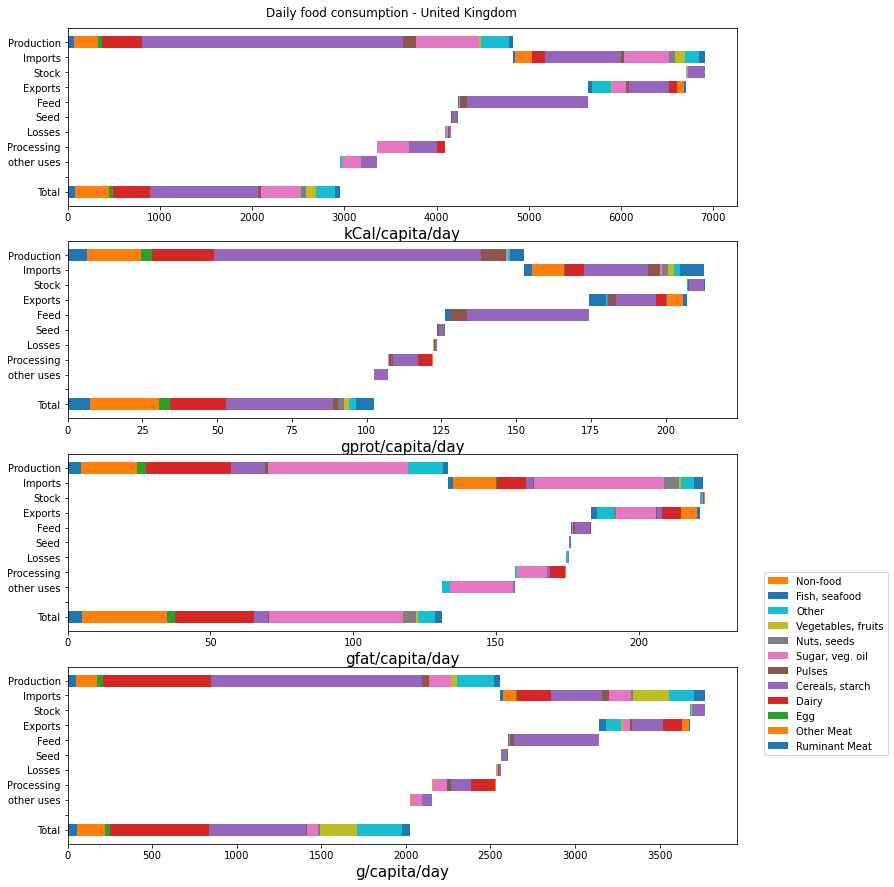

In [18]:
fig, ax = plt.subplots(4,1,figsize=(12,15))

people = ('Production', 'Imports', 'Stock', 'Exports', 'Feed', 'Seed', 'Losses', 'Processing', 'other uses', '', 'Total')
y_pos = np.arange(len(people))

for iu in range(4):
    for ig in reversed(range(12)):
        ax[iu].barh(0, left = 0, width = np.cumsum(qtys[iu,0])[ig], color = f'C{ig}')
        ax[iu].barh(1, left = np.sum(qtys[iu,0]), width = np.cumsum(qtys[iu,1])[ig], color = f'C{ig}')
        ax[iu].barh(2, left = np.sum(qtys[iu,:2]), width = -np.cumsum(qtys[iu,2])[ig], color = f'C{ig}')
        ax[iu].barh(3, left = np.sum(qtys[iu,:2]) - np.sum(qtys[iu,2]), width = -np.cumsum(qtys[iu,3])[ig], color = f'C{ig}')
        ax[iu].barh(4, left = np.sum(qtys[iu,:2]) - np.sum(qtys[iu,2:4]), width = -np.cumsum(qtys[iu,4])[ig], color = f'C{ig}')
        ax[iu].barh(5, left = np.sum(qtys[iu,:2]) - np.sum(qtys[iu,2:5]), width = -np.cumsum(qtys[iu,5])[ig], color = f'C{ig}')
        ax[iu].barh(6, left = np.sum(qtys[iu,:2]) - np.sum(qtys[iu,2:6]), width = -np.cumsum(qtys[iu,6])[ig], color = f'C{ig}')
        ax[iu].barh(7, left = np.sum(qtys[iu,:2]) - np.sum(qtys[iu,2:7]), width = -np.cumsum(qtys[iu,7])[ig], color = f'C{ig}')
        ax[iu].barh(8, left = np.sum(qtys[iu,:2]) - np.sum(qtys[iu,2:8]), width = -np.cumsum(qtys[iu,8])[ig], color = f'C{ig}')

        ax[iu].barh(10, left = 0, width=np.cumsum(qtys[iu,10])[ig], color = f'C{ig}', label = group_names[ig]) 

    ax[iu].set_yticks(np.arange(len(people)))
    ax[iu].set_yticklabels(labels=people)
    ax[iu].invert_yaxis()  # labels read top-to-bottom
    ax[iu].set_xlabel(labels[iu], size=15)
#     ax[iu].set_title(f'total {labels[iu]} supply')

plt.suptitle('Daily food consumption - United Kingdom', y=0.90)
plt.legend(loc=(1.04,0.5))
plt.show()

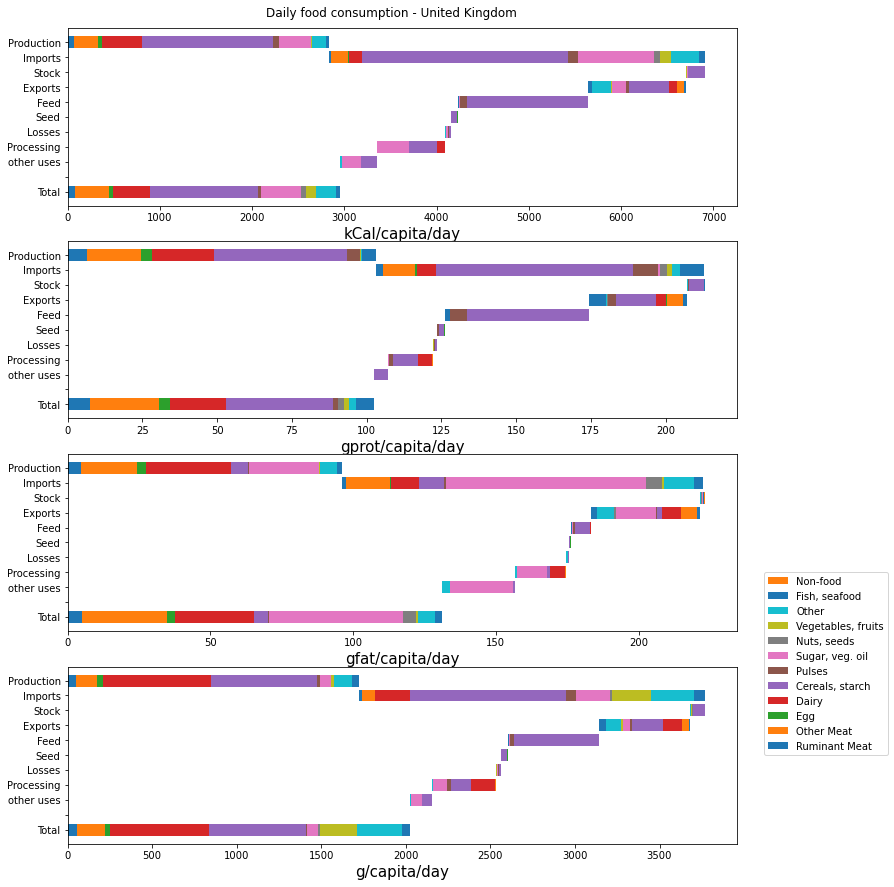

In [19]:
fig, ax = plt.subplots(4,1,figsize=(12,15))

people = ('Production', 'Imports', 'Stock', 'Exports', 'Feed', 'Seed', 'Losses', 'Processing', 'other uses', '', 'Total')
y_pos = np.arange(len(people))

for iu in range(4):
    for ig in reversed(range(12)):
        ax[iu].barh(0, left = 0, width = np.cumsum(scaled_qtys[iu,0])[ig], color = f'C{ig}')
        ax[iu].barh(1, left = np.sum(scaled_qtys[iu,0]), width = np.cumsum(scaled_qtys[iu,1])[ig], color = f'C{ig}')
        ax[iu].barh(2, left = np.sum(scaled_qtys[iu,:2]), width = -np.cumsum(scaled_qtys[iu,2])[ig], color = f'C{ig}')
        ax[iu].barh(3, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2]), width = -np.cumsum(scaled_qtys[iu,3])[ig], color = f'C{ig}')
        ax[iu].barh(4, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:4]), width = -np.cumsum(scaled_qtys[iu,4])[ig], color = f'C{ig}')
        ax[iu].barh(5, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:5]), width = -np.cumsum(scaled_qtys[iu,5])[ig], color = f'C{ig}')
        ax[iu].barh(6, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:6]), width = -np.cumsum(scaled_qtys[iu,6])[ig], color = f'C{ig}')
        ax[iu].barh(7, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:7]), width = -np.cumsum(scaled_qtys[iu,7])[ig], color = f'C{ig}')
        ax[iu].barh(8, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:8]), width = -np.cumsum(scaled_qtys[iu,8])[ig], color = f'C{ig}')

        ax[iu].barh(10, left = 0, width=np.cumsum(scaled_qtys[iu,10])[ig], color = f'C{ig}', label = group_names[ig]) 

    ax[iu].set_yticks(np.arange(len(people)))
    ax[iu].set_yticklabels(labels=people)
    ax[iu].invert_yaxis()  # labels read top-to-bottom
    ax[iu].set_xlabel(labels[iu], size=15)
#     ax[iu].set_title(f'total {labels[iu]} supply')

plt.suptitle('Daily food consumption - United Kingdom', y=0.90)
plt.legend(loc=(1.04,0.5))
plt.show()

In [20]:
qtys[0,:,4]

array([2833.06034054,  820.75456545,  187.56771918,  431.52769744,
       1310.71650918,   61.8646542 ,   20.41219058,  301.14930534,
        165.66254435,    0.        , 1175.        ])

In [43]:
# Now change consumption 
plant_consumption = 1.7
i_Food_Supply = 10
import copy
qtys_change_consumption = copy.deepcopy(qtys)
qtys_change_consumption[:,i_Food_Supply, plant_mask] *= plant_consumption
delta_consumption = qtys_change_consumption[:,i_Food_Supply] - qtys[:,i_Food_Supply]
qtys_change_consumption[:,1] += delta_consumption

In [44]:
qtys[0,:,4]

array([2833.06034054,  820.75456545,  187.56771918,  431.52769744,
       1310.71650918,   61.8646542 ,   20.41219058,  301.14930534,
        165.66254435,    0.        , 1175.        ])

In [45]:
qtys_change_consumption[0,:,4]

array([2833.06034054, 1643.25456545,  187.56771918,  431.52769744,
       1310.71650918,   61.8646542 ,   20.41219058,  301.14930534,
        165.66254435,    0.        , 1997.5       ])

In [46]:
scaled_qtys = copy.deepcopy(qtys_change_consumption)

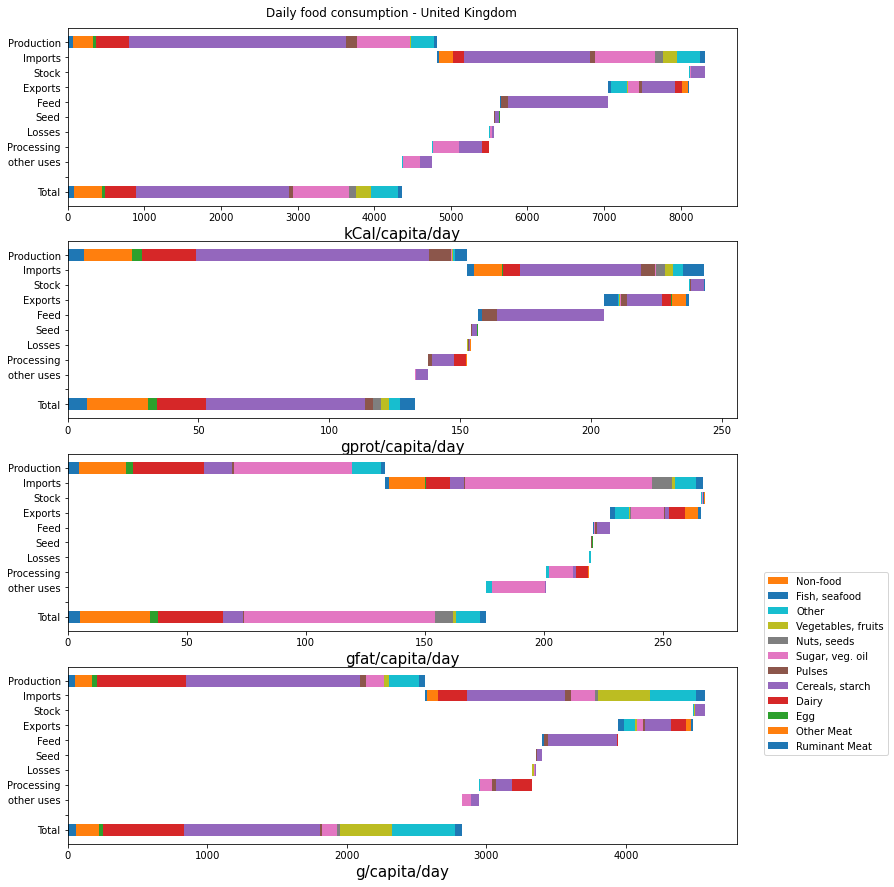

In [47]:
scaled_qtys = copy.deepcopy(qtys_change_consumption)
fig, ax = plt.subplots(4,1,figsize=(12,15))

people = ('Production', 'Imports', 'Stock', 'Exports', 'Feed', 'Seed', 'Losses', 'Processing', 'other uses', '', 'Total')
y_pos = np.arange(len(people))

for iu in range(4):
    for ig in reversed(range(12)):
        ax[iu].barh(0, left = 0, width = np.cumsum(scaled_qtys[iu,0])[ig], color = f'C{ig}')
        ax[iu].barh(1, left = np.sum(scaled_qtys[iu,0]), width = np.cumsum(scaled_qtys[iu,1])[ig], color = f'C{ig}')
        ax[iu].barh(2, left = np.sum(scaled_qtys[iu,:2]), width = -np.cumsum(scaled_qtys[iu,2])[ig], color = f'C{ig}')
        ax[iu].barh(3, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2]), width = -np.cumsum(scaled_qtys[iu,3])[ig], color = f'C{ig}')
        ax[iu].barh(4, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:4]), width = -np.cumsum(scaled_qtys[iu,4])[ig], color = f'C{ig}')
        ax[iu].barh(5, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:5]), width = -np.cumsum(scaled_qtys[iu,5])[ig], color = f'C{ig}')
        ax[iu].barh(6, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:6]), width = -np.cumsum(scaled_qtys[iu,6])[ig], color = f'C{ig}')
        ax[iu].barh(7, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:7]), width = -np.cumsum(scaled_qtys[iu,7])[ig], color = f'C{ig}')
        ax[iu].barh(8, left = np.sum(scaled_qtys[iu,:2]) - np.sum(scaled_qtys[iu,2:8]), width = -np.cumsum(scaled_qtys[iu,8])[ig], color = f'C{ig}')

        ax[iu].barh(10, left = 0, width=np.cumsum(scaled_qtys[iu,10])[ig], color = f'C{ig}', label = group_names[ig]) 

    ax[iu].set_yticks(np.arange(len(people)))
    ax[iu].set_yticklabels(labels=people)
    ax[iu].invert_yaxis()  # labels read top-to-bottom
    ax[iu].set_xlabel(labels[iu], size=15)
#     ax[iu].set_title(f'total {labels[iu]} supply')

plt.suptitle('Daily food consumption - United Kingdom', y=0.90)
plt.legend(loc=(1.04,0.5))
plt.show()

In [37]:
# rescale imports
all_but_prod_imp = np.sum(qtys_change_consumption[:, 2:, plant_mask], axis=1)
minus_scaled_prod = all_but_prod_imp - qtys_change_consumption[:, 0, plant_mask]*plant_production
qtys_change_consumption[:,1,plant_mask] = minus_scaled_prod